In [ ]:
import numpy as np
import pandas as pd

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mental_health.csv')
pd.set_option('display.max_columns', None)
df

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


Data Cleaning

In [ ]:
df.isna().sum()

,0
text,2
label,0


In [ ]:
df.dropna(inplace= True)

In [ ]:
df.isna().sum()

,0
text,0
label,0


In [ ]:
df['text'] = df['text'].str.lower()

In [ ]:
df.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# for i in df['text']:
#   ''. join(re.sub(r'[^\w\s]', '', i))

Remove punctuation

In [ ]:
df['text'].str.replace(r'[^\w\s]', '', regex = True)

,text
0,dear american teens question dutch person hear...
1,nothing look forward lifei dont many reasons k...
2,music recommendations im looking expand playli...
3,im done trying feel betterthe reason im still ...
4,worried year old girl subject domestic physic...
...,...
27972,posting everyday people stop caring religion ...
27973,okay definetly need hear guys opinion ive pret...
27974,cant get dog think ill kill myselfthe last thi...
27975,whats point princess bridei really think like ...


Remove punctuations

In [ ]:
df['text'] = df['text'].str.replace(r'[^\w\s]', ' ', regex = True)

Remove extra spaces

In [ ]:
df['text'] = df['text'].str.replace(r'\s+', ' ', regex= True)

Remove trailing spaces

In [ ]:
df['text'] = df['text'].str.strip()

In [ ]:
df['text']

,text
0,dear american teens question dutch person hear...
1,nothing look forward lifei dont many reasons k...
2,music recommendations im looking expand playli...
3,im done trying feel betterthe reason im still ...
4,worried year old girl subject domestic physica...
...,...
27972,posting everyday people stop caring religion m...
27973,okay definetly need hear guys opinion ive pret...
27974,cant get dog think ill kill myselfthe last thi...
27975,whats point princess bridei really think like ...


In [ ]:
stopword = stopwords.words('english')
len(stopword)

198

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    # tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

In [ ]:
df['processed_text'] = df['text'].apply(preprocess_text)

word2vec , doc2vec , glove, robot , distill

lstm, gru, bi-directional lstm

In [ ]:
df3

,text,label,processed_text
0,dear american teens question dutch person hear...,0,"[dear, american, teens, question, dutch, perso..."
1,nothing look forward lifei dont many reasons k...,1,"[nothing, look, forward, lifei, dont, many, re..."
2,music recommendations im looking expand playli...,0,"[music, recommendations, im, looking, expand, ..."
3,im done trying feel betterthe reason im still ...,1,"[im, done, trying, feel, betterthe, reason, im..."
4,worried year old girl subject domestic physica...,1,"[worried, year, old, girl, subject, domestic, ..."
...,...,...,...
27972,posting everyday people stop caring religion m...,0,"[posting, everyday, people, stop, caring, reli..."
27973,okay definetly need hear guys opinion ive pret...,0,"[okay, definetly, need, hear, guys, opinion, i..."
27974,cant get dog think ill kill myselfthe last thi...,1,"[cant, get, dog, think, ill, kill, myselfthe, ..."
27975,whats point princess bridei really think like ...,1,"[whats, point, princess, bridei, really, think..."


In [ ]:
df['text'][0]

'dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like right guys learn math'

In [ ]:
print('i' in stopword)

True


In [ ]:
from nltk.corpus import stopwords, wordnet

In [ ]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
from nltk import pos_tag

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default

def preprocess_text1(text):
    tokens = [word for word in text]
    tagged = pos_tag(tokens)
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tagged]
    return lemmatized


df['processed_text1'] = df['processed_text'].apply(preprocess_text1)

In [ ]:
df

,text,label,processed_text,processed_text1
0,dear american teens question dutch person hear...,0,"[dear, american, teens, question, dutch, perso...","[dear, american, teen, question, dutch, person..."
1,nothing look forward lifei dont many reasons k...,1,"[nothing, look, forward, lifei, dont, many, re...","[nothing, look, forward, lifei, dont, many, re..."
2,music recommendations im looking expand playli...,0,"[music, recommendations, im, looking, expand, ...","[music, recommendation, im, look, expand, play..."
3,im done trying feel betterthe reason im still ...,1,"[im, done, trying, feel, betterthe, reason, im...","[im, do, try, feel, betterthe, reason, im, sti..."
4,worried year old girl subject domestic physica...,1,"[worried, year, old, girl, subject, domestic, ...","[worried, year, old, girl, subject, domestic, ..."
...,...,...,...,...
27972,posting everyday people stop caring religion m...,0,"[posting, everyday, people, stop, caring, reli...","[post, everyday, people, stop, care, religion,..."
27973,okay definetly need hear guys opinion ive pret...,0,"[okay, definetly, need, hear, guys, opinion, i...","[okay, definetly, need, hear, guys, opinion, i..."
27974,cant get dog think ill kill myselfthe last thi...,1,"[cant, get, dog, think, ill, kill, myselfthe, ...","[cant, get, dog, think, ill, kill, myselfthe, ..."
27975,whats point princess bridei really think like ...,1,"[whats, point, princess, bridei, really, think...","[whats, point, princess, bridei, really, think..."


In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 71.8 MB/s eta 0:00:00


In [ ]:
from gensim.models import word2vec

In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# --- Step 4: Tokenization ---

tokenizer = Tokenizer(num_words= 10000, oov_token= "<OOV>")

tokenizer.fit_on_texts(df['processed_text1'])
sequences = tokenizer.texts_to_sequences(df['processed_text1'])

word_index = tokenizer.word_index
print(f"Vocab size: {len(word_index)}")

Vocab size: 65451


before -> Vocab size: 65450

In [ ]:
word_index['hi']

1053

In [ ]:
word_index['hello']

1094

In [ ]:
word_index['hungry']

1926

In [ ]:
word_index['eat']

268

In [ ]:
lengths = [len(s) for s in df['processed_text1']]
print(np.percentile(lengths, [90, 95, 99]))

[161.   231.   457.26]


90% of your sentences have ≤ 161 tokens

95% of your sentences have ≤ 231 tokens

99% of your sentences have ≤ 457 tokens

padding

# x, y

In [ ]:
max_len = 231
x = pad_sequences(sequences, maxlen= max_len, padding='post')
y = np.array(df['label'])

In [ ]:
# x

array([[1721,  678,  789, ...,    0,    0,    0],
       [  67,   66,  519, ...,    0,    0,    0],
       [ 315, 2507,    2, ...,    0,    0,    0],
       ...,
       [  19,    3,  413, ...,    0,    0,    0],
       [ 259,   84, 4019, ...,    0,    0,    0],
       [   3, 2286,   86, ...,    0,    0,    0]], dtype=int32)

 --- Step 5: Load GloVe embeddings ---

 Download this file manually:

 !wget http://nlp.stanford.edu/data/glove.6B.zip && !unzip glove.6B.zip

 We'll use glove.6B.100d.txt

In [ ]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
# !unzip glove.6B.zip

GloVe =

{ word 1: [..... 100d...],

  word 2: [..... 100d...],

  .
  .
  4 lakh words } --> embeddings_index

In [ ]:
embeddings_index = {}
glove_path = "/content/drive/MyDrive/Glove/glove.6B.100d.txt"  # <-- Update path if needed

with open(glove_path, encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f"Loaded {len(embeddings_index)} word vectors from GloVe.")

Loaded 400000 word vectors from GloVe.


Matching the word vectors from Glove dictionary (embedding_index) -> dataset dictionary (word_index)

if word there in Glove dict return that 100d vector

else return random 100d numbers from 0 to 1

In [ ]:
embeddings_index

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [ ]:
word_index-


{'<OOV>': 1,
 'im': 2,
 'get': 3,
 'like': 4,
 'want': 5,
 'go': 6,
 'feel': 7,
 'know': 8,
 'life': 9,
 'make': 10,
 'think': 11,
 'time': 12,
 'one': 13,
 'even': 14,
 'people': 15,
 'ive': 16,
 'would': 17,
 'year': 18,
 'cant': 19,
 'really': 20,
 'say': 21,
 'thing': 22,
 'day': 23,
 'friend': 24,
 'good': 25,
 'try': 26,
 'see': 27,
 'never': 28,
 'tell': 29,
 'dont': 30,
 'help': 31,
 'take': 32,
 'fuck': 33,
 'much': 34,
 'live': 35,
 'love': 36,
 'end': 37,
 'talk': 38,
 'work': 39,
 'bad': 40,
 'well': 41,
 'way': 42,
 'need': 43,
 'kill': 44,
 'die': 45,
 'could': 46,
 'br': 47,
 'give': 48,
 'back': 49,
 'still': 50,
 'come': 51,
 'find': 52,
 'anything': 53,
 'someone': 54,
 'start': 55,
 'something': 56,
 'anymore': 57,
 'always': 58,
 'school': 59,
 'family': 60,
 'film': 61,
 'keep': 62,
 'everything': 63,
 'movie': 64,
 'every': 65,
 'look': 66,
 'nothing': 67,
 'leave': 68,
 'anyone': 69,
 'also': 70,
 'care': 71,
 'right': 72,
 'ever': 73,
 'last': 74,
 'hate': 75,
 

Frequency of each word

In [ ]:
sorted(tokenizer.word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

[('im', 34720),
 ('get', 23787),
 ('like', 23185),
 ('want', 21550),
 ('go', 20618),
 ('feel', 18217),
 ('know', 18185),
 ('life', 14863),
 ('make', 13751),
 ('think', 13418)]

In [ ]:
tokenizer.word_counts  # dictionary: {word: count}

OrderedDict([('dear', 122),
             ('american', 425),
             ('teen', 356),
             ('question', 1173),
             ('dutch', 26),
             ('person', 3562),
             ('hear', 1245),
             ('guy', 3069),
             ('get', 23787),
             ('way', 6345),
             ('easy', 1053),
             ('thing', 9808),
             ('learn', 960),
             ('age', 1006),
             ('u', 2848),
             ('sooooo', 7),
             ('thth', 2),
             ('grader', 12),
             ('like', 23185),
             ('right', 4299),
             ('math', 261),
             ('nothing', 4666),
             ('look', 4708),
             ('forward', 587),
             ('lifei', 90),
             ('dont', 7829),
             ('many', 3191),
             ('reason', 3098),
             ('keep', 4751),
             ('go', 20618),
             ('feel', 18217),
             ('next', 1789),
             ('day', 9511),
             ('make', 13751),
          

In [ ]:
from collections import Counter

word_counts = Counter()
for seq in sequences:
    for token in seq:
        word_counts[token] += 1

total_tokens = sum(word_counts.values())
sorted_counts = sorted(word_counts.values(), reverse=True)

for limit in [1000, 5000, 10000, 30000, 64000]:
    coverage = sum(sorted_counts[:limit]) / total_tokens
    print(f"Top {limit} words cover {coverage*100:.2f}% of total tokens")


Top 1000 words cover 80.86% of total tokens
Top 5000 words cover 96.59% of total tokens
Top 10000 words cover 100.00% of total tokens
Top 30000 words cover 100.00% of total tokens
Top 64000 words cover 100.00% of total tokens


In [ ]:
# --- Step 6: Create Embedding Matrix ---

embedding_dim = 100
# vocab_size = len(word_index) + 1
vocab_size = 10000
embedding_matrix = np.zeros((vocab_size , embedding_dim))   # -> starting 0

for word, i in word_index.items():
  if i >= 10000:
      continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector
  else:
      embedding_matrix[i] = np.random.normal(0, 1, embedding_dim)

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.44496177, -0.01195252, -0.02746352, ...,  0.49677621,
         0.63868959, -2.2675602 ],
       [ 0.41711   , -0.10176   ,  0.058147  , ..., -0.29444   ,
        -0.039114  ,  0.39534   ],
       ...,
       [ 0.37388   , -0.11378   ,  0.014869  , ...,  0.77741998,
        -0.58196002,  0.063369  ],
       [-0.81405002, -0.33563   , -0.60811001, ..., -0.20566   ,
        -1.02149999, -0.78353   ],
       [-0.48604   , -0.92865998,  0.065223  , ..., -0.22911   ,
        -1.00549996,  0.60724002]])

In [ ]:
len(embedding_matrix)

10000

Train-Test Split


In [ ]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# ! pip install keras

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.optimizers import Adam

In [ ]:
# --- Step 8: Build Model ---

# model = Sequential([
#     Embedding(input_dim = vocab_size ,    # 63942
#               output_dim = 100,          # embedding_dim
#               weights = [embedding_matrix], # mapped vectors
#               # input_length = max_len,    # 231 -> tokens in each sentence (keras knows the input length)
#               trainable=True),
#     Dropout(0.3),
#     Bidirectional(LSTM(128, return_sequences=False)),
#     Dense(64, activation='relu'),
#     Dropout(0.3),
#     Dense(1, activation='sigmoid')
# ])

In [ ]:
# model.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics = ["Accuracy"])
# model.summary()

In [ ]:
# print(np.max(x_train))
# print(vocab_size)

In [ ]:
# model.fit(x_train, y_train, epochs = 10, batch_size= 60, validation_data = (x_test, y_test))

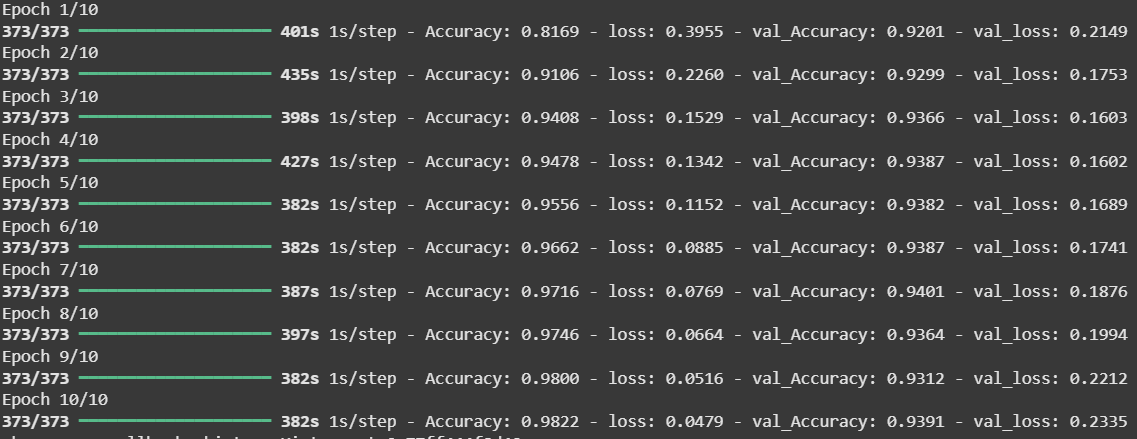

In [ ]:
# --- Step 10: Evaluate ---
# loss, acc = model.evaluate(x_test, y_test)
# print(f"Test Accuracy: {acc:.4f}")

In [ ]:
# model.build(input_shape=(60, max_len))
# model.summary()

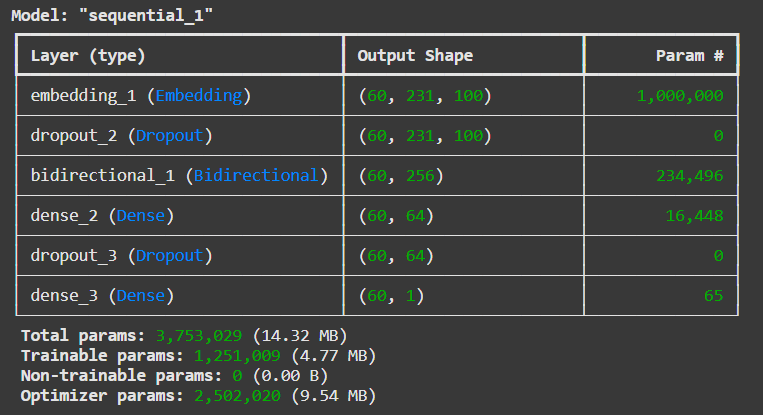

>>>>>>>>>>>>>>>>>>>>>>>

bidirectional_1 (Bidirectional) │ (60, 256)              │       234,496

Forward LSTM: 128 units

Backward LSTM: 128 units

Output: 128 + 128 = 256

Params = 4 * [(input_dim + hidden_layers) * hidden_layers + hidden_layers]

input_dim = 100, hidden_layers = 128

→ 4 * [(100 + 128) * 128 + 128] = 117,248

117,248 x 2 = 234,496

----------------------------------------------------------------------------

dense_2 (Dense)                 │ (60, 64)               │        16,448

Input: 256 from Bi-LSTM

Output: 64 neurons

---------------------------------------------------------------

dense_3 (Dense)                 │ (60, 1)                │            65

Input: 64 from previous Dense layer

Output: 1 (binary classification)

--------------------------------------------

| Layer     | Input          | Output         |
| --------- | -------------- | -------------- |
| Embedding | (60, 231)      | (60, 231, 100) |
| Bi-LSTM   | (60, 231, 100) | (60, 256)      |
| Dense 1   | (60, 256)      | (60, 64)       |
| Dense 2   | (60, 64)       | (60, 1)        |


In [ ]:
# SavedModel format creates a folder
# model.save("my_model_tf")

In [ ]:
# from tensorflow.keras.models import load_model
# loaded_model = load_model("my_model_tf")

In [ ]:
# Save the entire model (architecture + weights + optimizer state)
# model.save("my_model_bi-LSTM.h5")

In [ ]:
# from tensorflow.keras.models import load_model
# loaded_model = load_model("my_model_bi-LSTM.h5")

In [ ]:
# model.save('my_model_bi-LSTM.keras')

In [ ]:
# model = Sequential([
#     Embedding(input_dim = vocab_size ,    # 10k
#               output_dim = 100,          # embedding_dim
#               weights = [embedding_matrix], # mapped vectors
#               input_length = max_len,    # 231 -> tokens in each sentence (keras knows the input length)
#               trainable = False),
#     Dropout(0.3),
#     Bidirectional(LSTM(64, dropout = 0.3, recurrent_dropout = 0.3 ,return_sequences=False)),
#     Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
#     Dropout(0.3),
#     Dense(1, activation='sigmoid')
# ])

In [ ]:
# model.compile(optimizer = Adam(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [ ]:
#  history_phase1 = model.fit(
#     x_train, y_train,
#     validation_data=(x_test, y_test),
#     epochs=10,
#     batch_size=60,
#     callbacks=[early_stop],
#     verbose=1
# )

In [ ]:
# model.evaluate(x_test, y_test)

In [ ]:
# model.summary()

Validation

In [ ]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import numpy as np

# # Suppose these are new sentences you want to validate
# sentences = [
#     "I really love this product",
#     "This is the worst experience ever",
#     "Not sure how I feel about it",
#     'live guiltok made stupid random choice  its getting me basically molested relative super erratic thing haunting right now random walk home randomly assaulted classmate screamed name loud pretty much annoying asshole everything could torment later excluded i excluded well none mattered later went bunch horrible things people already loner death wish gets everyday living guilt possibly created mass shooter hear hes basically end life ready die', # -> 0
#     'sure leave noteso im struggling place leave note obvious family die find read it especially includes instructions funeral i want wasting money it shit like that need find soon can want find kill though difficult impulsive person know exactly im going it definately happening soon want find die freak out leave this', # -> 1
#     'i really want to kill myself',
#     'i am feeling safe',
#     'i am so happy right now that i want to enjoy my meal with a smile on my face',
#     'i feel threatened right now, i feel so scared.'
# ]

# # 1️⃣ Convert sentences to sequences using the same tokenizer
# sequences = tokenizer.texts_to_sequences(sentences)

# # 2️⃣ Pad sequences to the same max_len used in training
# padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# # 3️⃣ Predict probabilities
# pred_probs = model.predict(padded_sequences)

# # 4️⃣ Convert probabilities to binary labels (for binary classification)
# pred_labels = (pred_probs > 0.5).astype(int)

# # 5️⃣ Print results
# for i, sent in enumerate(sentences):
#     print(f"Sentence: {sent}")
#     print(f"Predicted probability: {pred_probs[i][0]:.4f}, Predicted label: {pred_labels[i][0]}\n")


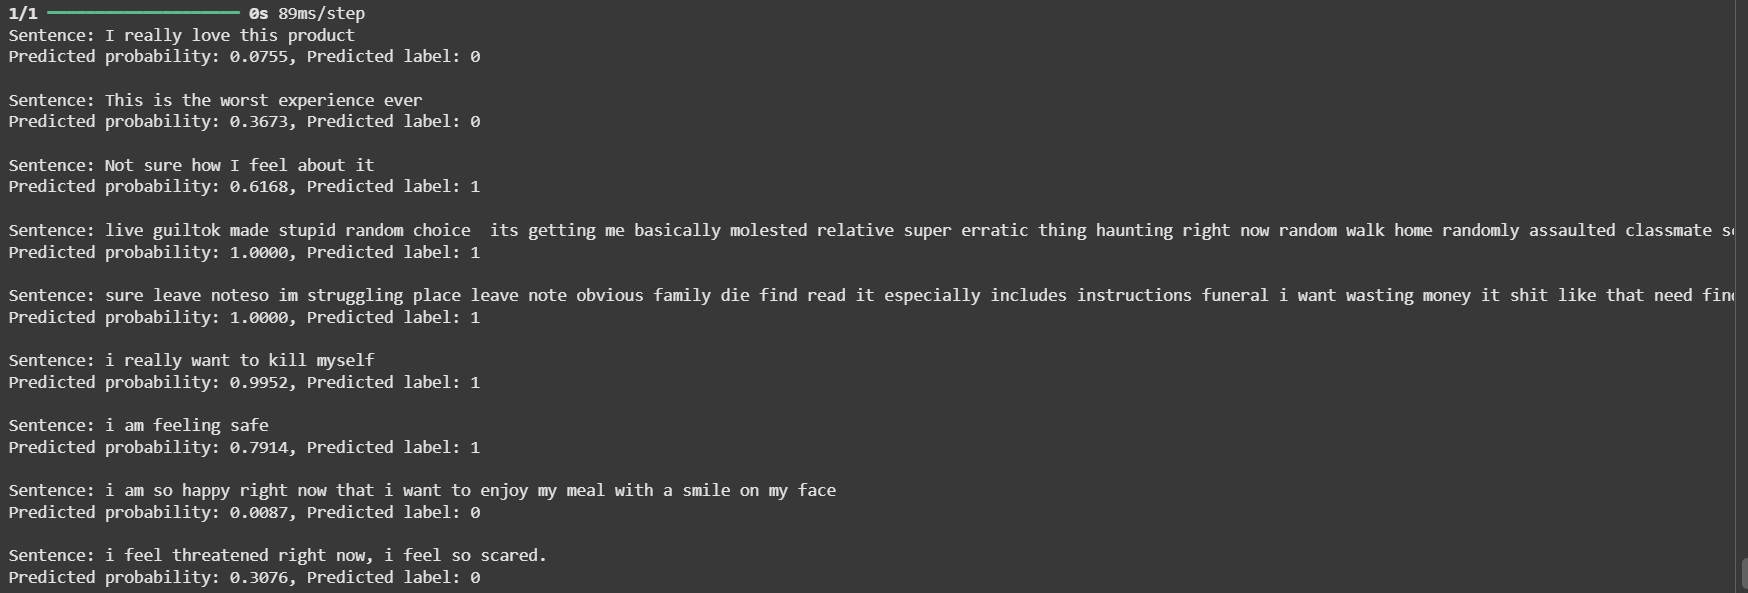

Phase 2 -> unnfreeze

In [ ]:
# model.layers[0].trainable = True  # unfreeze embedding

In [ ]:
# model.compile(optimizer = Adam(learning_rate = 1e-5),  # much smaller LR
#               loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# history_phase2 = model.fit(
#     x_train, y_train,
#     validation_data=(x_test, y_test),
#     epochs=3,
#     batch_size=60,
#     callbacks=[early_stop],
#     verbose=1
# )

In [ ]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import numpy as np

# # Suppose these are new sentences you want to validate
# sentences = [
#     "I really love this product",
#     "This is the worst experience ever",
#     "Not sure how I feel about it",
#     'live guiltok made stupid random choice  its getting me basically molested relative super erratic thing haunting right now random walk home randomly assaulted classmate screamed name loud pretty much annoying asshole everything could torment later excluded i excluded well none mattered later went bunch horrible things people already loner death wish gets everyday living guilt possibly created mass shooter hear hes basically end life ready die', # -> 0
#     'sure leave noteso im struggling place leave note obvious family die find read it especially includes instructions funeral i want wasting money it shit like that need find soon can want find kill though difficult impulsive person know exactly im going it definately happening soon want find die freak out leave this', # -> 1
#     'i really want to kill myself',
#     'i am feeling safe',
#     'i am so happy right now that i want to enjoy my meal with a smile on my face',
#     'i feel threatened right now, i feel so scared.'
# ]

# # 1️⃣ Convert sentences to sequences using the same tokenizer
# sequences = tokenizer.texts_to_sequences(sentences)

# # 2️⃣ Pad sequences to the same max_len used in training
# padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# # 3️⃣ Predict probabilities
# pred_probs = model.predict(padded_sequences)

# # 4️⃣ Convert probabilities to binary labels (for binary classification)
# pred_labels = (pred_probs > 0.5).astype(int)

# # 5️⃣ Print results
# for i, sent in enumerate(sentences):
#     print(f"Sentence: {sent}")
#     print(f"Predicted probability: {pred_probs[i][0]:.4f}, Predicted label: {pred_labels[i][0]}\n")


## BI- LSTM -> batch = 60 , epochs -> phase 1 = 10, phase 2 = 3

phase 1 epochs

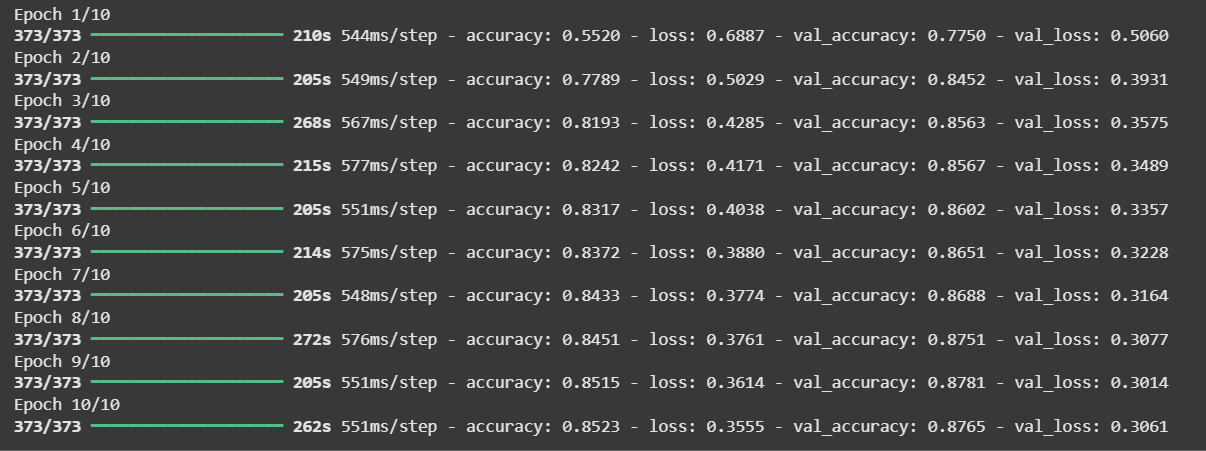

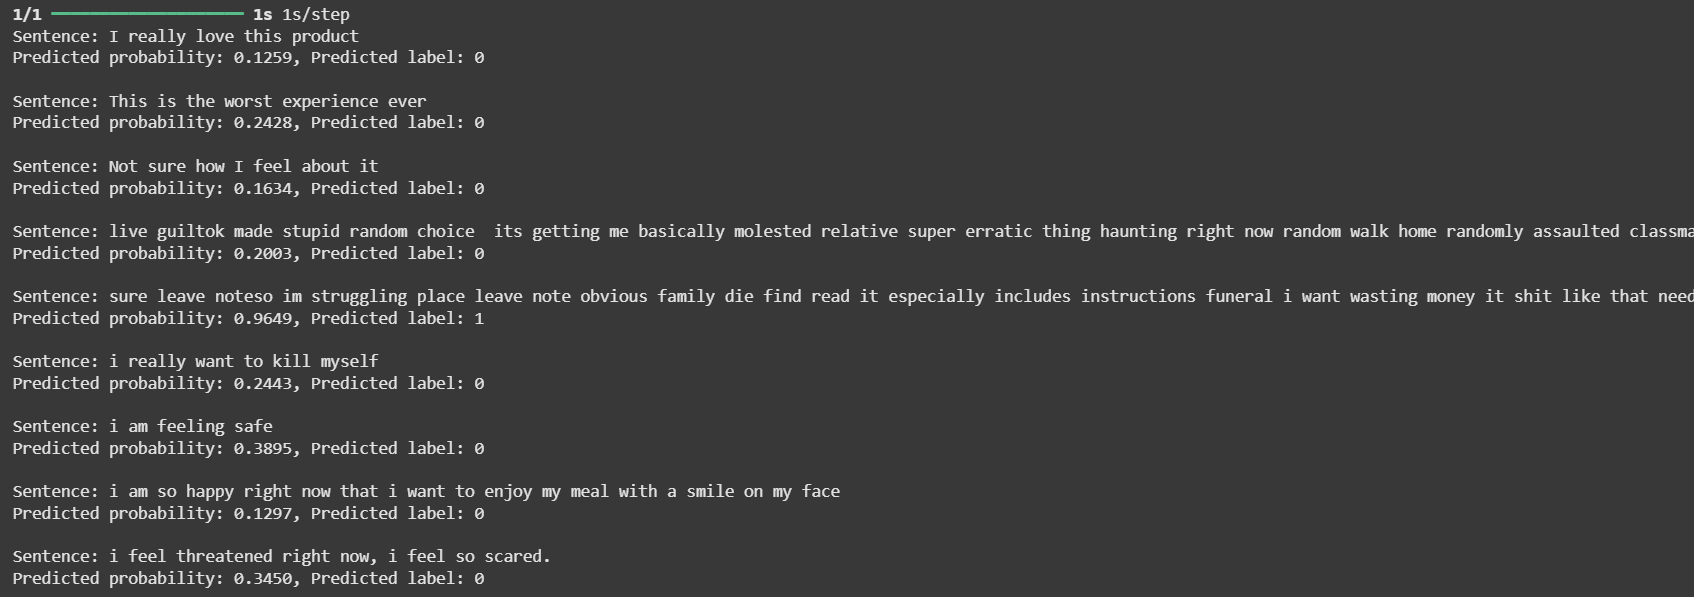

phase 2 epoch

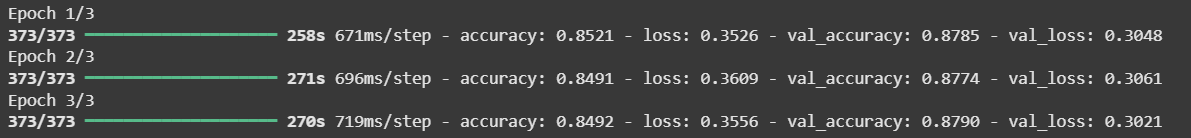

validation epoch phase 2

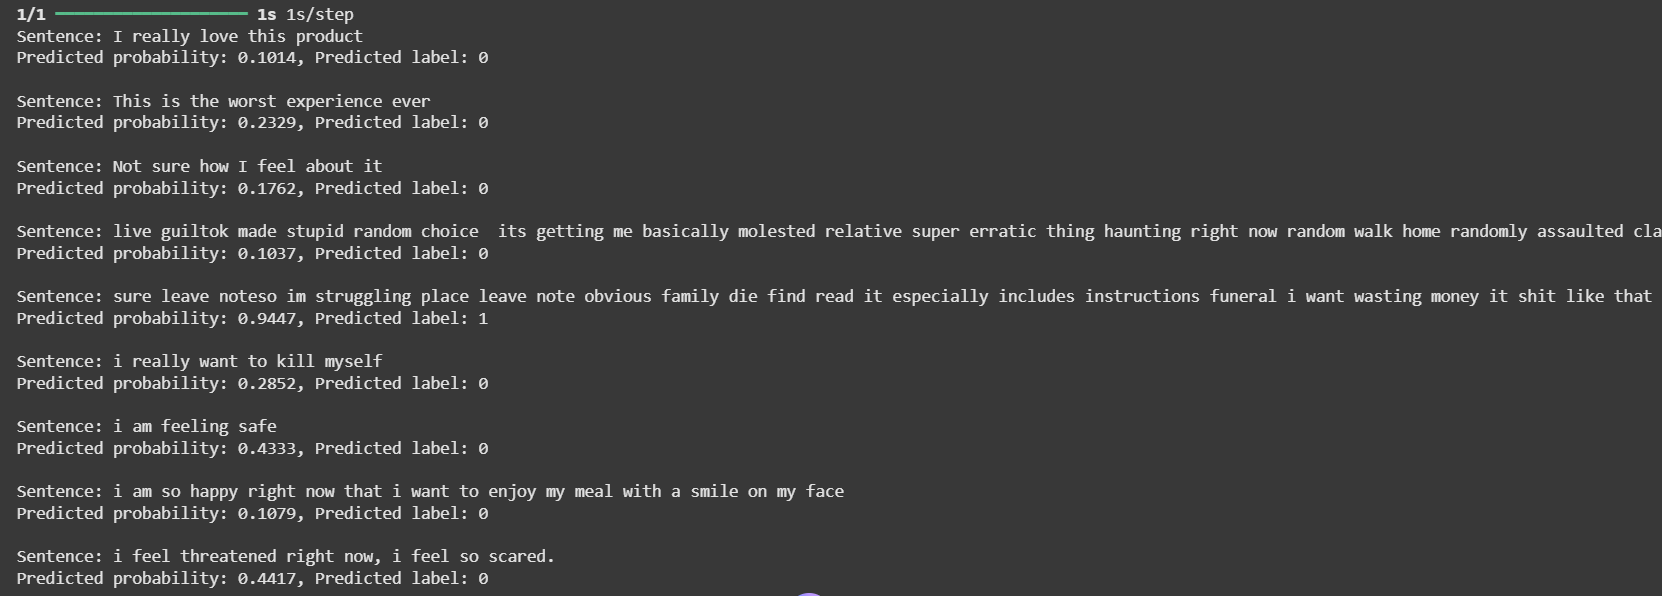

Input → [Embedding weights UPDATED] → [LSTM weights UPDATED] → [Dense weights UPDATED] → Loss ↓


Input → [Embedding weights FROZEN] → [LSTM weights UPDATED] → [Dense weights UPDATED] → Loss ↓


Bi-LSTM epochs -> 15, batch = 32, lr = 1e-4

In [ ]:
# model = Sequential([
#     Embedding(input_dim = vocab_size ,    # 10k
#               output_dim = 100,          # embedding_dim
#               weights = [embedding_matrix], # mapped vectors
#               input_length = max_len,    # 231 -> tokens in each sentence (keras knows the input length)
#               trainable = False),
#     Dropout(0.3),
#     Bidirectional(LSTM(64, dropout = 0.3, recurrent_dropout = 0.3 ,return_sequences=False)),
#     Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
#     Dropout(0.3),
#     Dense(1, activation='sigmoid')
# ])

In [ ]:
model.compile(optimizer = Adam(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#  history_phase1 = model.fit(
#     x_train, y_train,
#     validation_data=(x_test, y_test),
#     epochs = 15,
#     batch_size = 32,
#     callbacks=[early_stop],
#     verbose=1
# )

Epoch 1/15
700/700 ━━━━━━━━━━━━━━━━━━━━ 375s 523ms/step - accuracy: 0.5692 - loss: 0.6766 - val_accuracy: 0.8349 - val_loss: 0.4010
Epoch 2/15
700/700 ━━━━━━━━━━━━━━━━━━━━ 365s 521ms/step - accuracy: 0.8036 - loss: 0.4542 - val_accuracy: 0.8550 - val_loss: 0.3456
Epoch 3/15
700/700 ━━━━━━━━━━━━━━━━━━━━ 366s 523ms/step - accuracy: 0.8258 - loss: 0.4091 - val_accuracy: 0.8631 - val_loss: 0.3261
Epoch 4/15
700/700 ━━━━━━━━━━━━━━━━━━━━ 363s 518ms/step - accuracy: 0.8411 - loss: 0.3783 - val_accuracy: 0.8701 - val_loss: 0.3173
Epoch 5/15
700/700 ━━━━━━━━━━━━━━━━━━━━ 387s 525ms/step - accuracy: 0.8442 - loss: 0.3728 - val_accuracy: 0.8718 - val_loss: 0.3172
Epoch 6/15
700/700 ━━━━━━━━━━━━━━━━━━━━ 367s 524ms/step - accuracy: 0.8463 - loss: 0.3682 - val_accuracy: 0.8777 - val_loss: 0.3005
Epoch 7/15
700/700 ━━━━━━━━━━━━━━━━━━━━ 378s 518ms/step - accuracy: 0.8519 - loss: 0.3555 - val_accuracy: 0.8779 - val_loss: 0.3022
Epoch 8/15
700/700 ━━━━━━━━━━━━━━━━━━━━ 377s 512ms/step - accuracy: 0.8542 -

In [ ]:
# model.evaluate(x_test, y_test)

175/175 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step - accuracy: 0.8929 - loss: 0.2781


[0.2821994125843048, 0.8882931470870972]

In [ ]:
# model.build(input_shape=(60, max_len))
# model.summary()

In [ ]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import numpy as np

# # Suppose these are new sentences you want to validate
# sentences = [
#     "I really love this product",
#     "This is the worst experience ever",
#     "Not sure how I feel about it",
#     'live guiltok made stupid random choice  its getting me basically molested relative super erratic thing haunting right now random walk home randomly assaulted classmate screamed name loud pretty much annoying asshole everything could torment later excluded i excluded well none mattered later went bunch horrible things people already loner death wish gets everyday living guilt possibly created mass shooter hear hes basically end life ready die', # -> 0
#     'sure leave noteso im struggling place leave note obvious family die find read it especially includes instructions funeral i want wasting money it shit like that need find soon can want find kill though difficult impulsive person know exactly im going it definately happening soon want find die freak out leave this', # -> 1
#     'i really want to kill myself',
#     'i am feeling safe',
#     'i am so happy right now that i want to enjoy my meal with a smile on my face',
#     'i feel threatened right now, i feel so scared.'
# ]

# # 1️⃣ Convert sentences to sequences using the same tokenizer
# sequences = tokenizer.texts_to_sequences(sentences)

# # 2️⃣ Pad sequences to the same max_len used in training
# padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# # 3️⃣ Predict probabilities
# pred_probs = model.predict(padded_sequences)

# # 4️⃣ Convert probabilities to binary labels (for binary classification)
# pred_labels = (pred_probs > 0.5).astype(int)

# # 5️⃣ Print results
# for i, sent in enumerate(sentences):
#     print(f"Sentence: {sent}")
#     print(f"Predicted probability: {pred_probs[i][0]:.4f}, Predicted label: {pred_labels[i][0]}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Sentence: I really love this product
Predicted probability: 0.0834, Predicted label: 0

Sentence: This is the worst experience ever
Predicted probability: 0.1456, Predicted label: 0

Sentence: Not sure how I feel about it
Predicted probability: 0.1151, Predicted label: 0

Sentence: live guiltok made stupid random choice  its getting me basically molested relative super erratic thing haunting right now random walk home randomly assaulted classmate screamed name loud pretty much annoying asshole everything could torment later excluded i excluded well none mattered later went bunch horrible things people already loner death wish gets everyday living guilt possibly created mass shooter hear hes basically end life ready die
Predicted probability: 0.1439, Predicted label: 0

Sentence: sure leave noteso im struggling place leave note obvious family die find read it especially includes instructions funeral i want wasting money it shit like that need find soo

Bi-LSTM epochs -> 15, batch = 32, lr = 1e-4

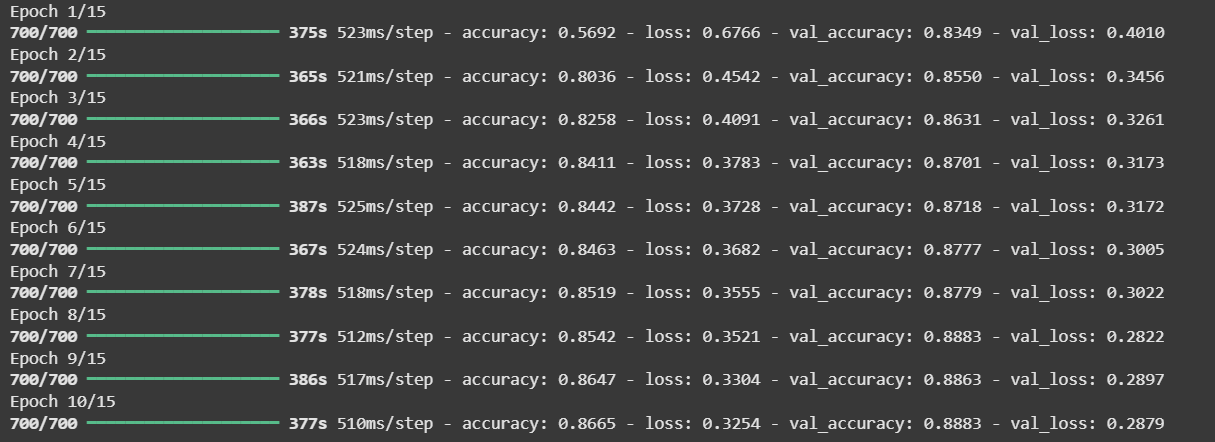

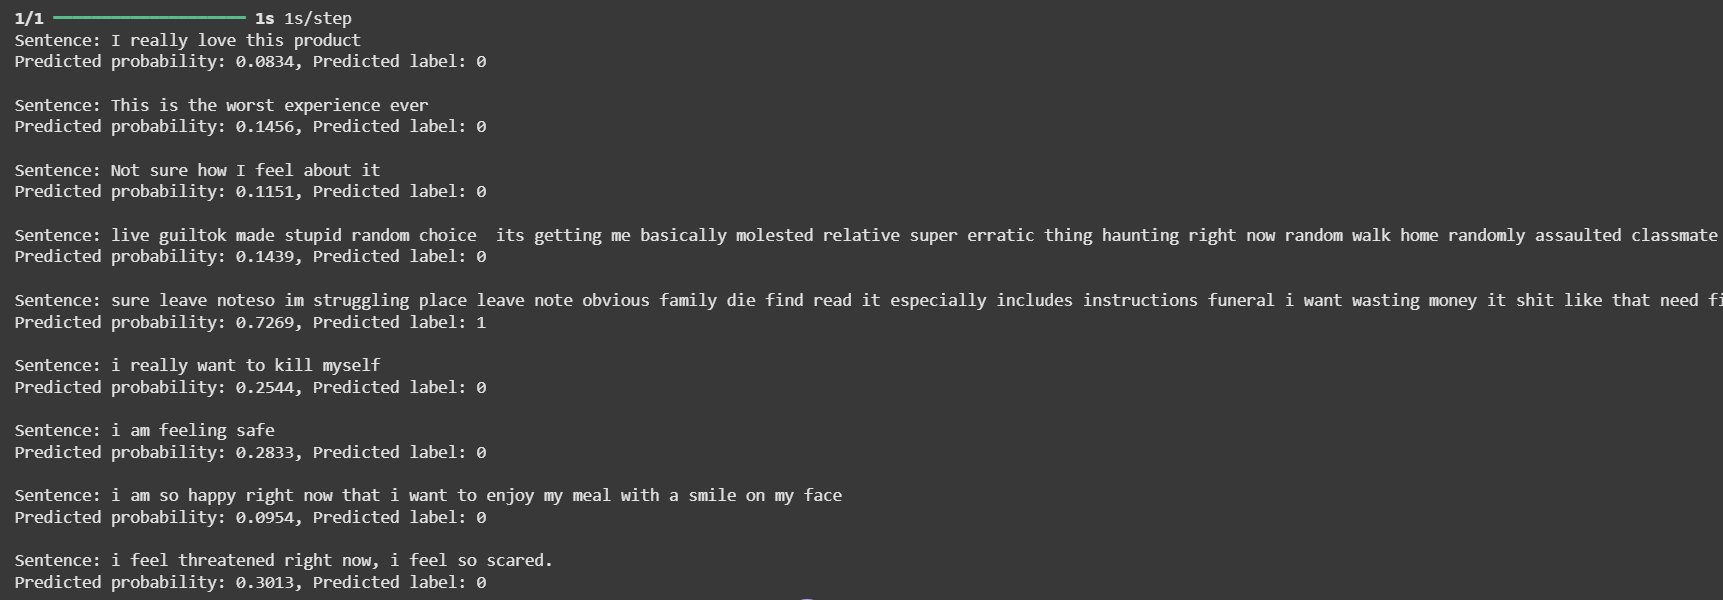

In [ ]:
from tensorflow.keras.layers import GRU

In [ ]:
# model = Sequential([
#     Embedding(input_dim = vocab_size ,    # 10k
#               output_dim = 100,          # embedding_dim
#               weights = [embedding_matrix], # mapped vectors
#               input_length = max_len,    # 231 -> tokens in each sentence (keras knows the input length)
#               trainable = False),
#     Dropout(0.3),
#     GRU(128, dropout = 0.3, recurrent_dropout = 0.3 ,return_sequences=False),
#     Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
#     Dense(1, activation='sigmoid')
# ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# model.compile(optimizer = Adam(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# model.fit(
#     x_train, y_train,
#     validation_data=(x_test, y_test),
#     epochs = 15,
#     batch_size = 32,
#     callbacks=[early_stop],
#     verbose=1
# )

Epoch 1/15
700/700 ━━━━━━━━━━━━━━━━━━━━ 353s 498ms/step - accuracy: 0.5113 - loss: 0.6965 - val_accuracy: 0.5360 - val_loss: 0.6888
Epoch 2/15
700/700 ━━━━━━━━━━━━━━━━━━━━ 342s 488ms/step - accuracy: 0.5325 - loss: 0.6884 - val_accuracy: 0.5467 - val_loss: 0.6805
Epoch 3/15
700/700 ━━━━━━━━━━━━━━━━━━━━ 348s 497ms/step - accuracy: 0.5436 - loss: 0.6840 - val_accuracy: 0.5498 - val_loss: 0.6748
Epoch 4/15
700/700 ━━━━━━━━━━━━━━━━━━━━ 341s 487ms/step - accuracy: 0.5951 - loss: 0.6630 - val_accuracy: 0.6956 - val_loss: 0.5709
Epoch 5/15
700/700 ━━━━━━━━━━━━━━━━━━━━ 346s 495ms/step - accuracy: 0.6748 - loss: 0.6059 - val_accuracy: 0.7015 - val_loss: 0.5655
Epoch 6/15
700/700 ━━━━━━━━━━━━━━━━━━━━ 373s 482ms/step - accuracy: 0.7076 - loss: 0.5856 - val_accuracy: 0.7315 - val_loss: 0.5393
Epoch 7/15
700/700 ━━━━━━━━━━━━━━━━━━━━ 339s 485ms/step - accuracy: 0.7251 - loss: 0.5621 - val_accuracy: 0.8013 - val_loss: 0.4727
Epoch 8/15
700/700 ━━━━━━━━━━━━━━━━━━━━ 389s 495ms/step - accuracy: 0.7524 -

In [ ]:
# model.evaluate(x_test, y_test)

175/175 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - accuracy: 0.8691 - loss: 0.3458


[0.3503757119178772, 0.8632707595825195]

175/175 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - accuracy: 0.8691 - loss: 0.3458
[0.3503757119178772, 0.8632707595825195]

In [ ]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import numpy as np

# # Suppose these are new sentences you want to validate
# sentences = [
#     "I really love this product",
#     "This is the worst experience ever",
#     "Not sure how I feel about it",
#     'live guiltok made stupid random choice  its getting me basically molested relative super erratic thing haunting right now random walk home randomly assaulted classmate screamed name loud pretty much annoying asshole everything could torment later excluded i excluded well none mattered later went bunch horrible things people already loner death wish gets everyday living guilt possibly created mass shooter hear hes basically end life ready die', # -> 0
#     'sure leave noteso im struggling place leave note obvious family die find read it especially includes instructions funeral i want wasting money it shit like that need find soon can want find kill though difficult impulsive person know exactly im going it definately happening soon want find die freak out leave this', # -> 1
#     'i really want to kill myself',
#     'i am feeling safe',
#     'i am so happy right now that i want to enjoy my meal with a smile on my face',
#     'i feel threatened right now, i feel so scared.'
# ]

# # 1️⃣ Convert sentences to sequences using the same tokenizer
# sequences = tokenizer.texts_to_sequences(sentences)

# # 2️⃣ Pad sequences to the same max_len used in training
# padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# # 3️⃣ Predict probabilities
# pred_probs = model.predict(padded_sequences)

# # 4️⃣ Convert probabilities to binary labels (for binary classification)
# pred_labels = (pred_probs > 0.5).astype(int)

# # 5️⃣ Print results
# for i, sent in enumerate(sentences):
#     print(f"Sentence: {sent}")
#     print(f"Predicted probability: {pred_probs[i][0]:.4f}, Predicted label: {pred_labels[i][0]}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Sentence: I really love this product
Predicted probability: 0.1164, Predicted label: 0

Sentence: This is the worst experience ever
Predicted probability: 0.1164, Predicted label: 0

Sentence: Not sure how I feel about it
Predicted probability: 0.1164, Predicted label: 0

Sentence: live guiltok made stupid random choice  its getting me basically molested relative super erratic thing haunting right now random walk home randomly assaulted classmate screamed name loud pretty much annoying asshole everything could torment later excluded i excluded well none mattered later went bunch horrible things people already loner death wish gets everyday living guilt possibly created mass shooter hear hes basically end life ready die
Predicted probability: 0.3986, Predicted label: 0

Sentence: sure leave noteso im struggling place leave note obvious family die find read it especially includes instructions funeral i want wasting money it shit like that need find soo

EPOCH = 15

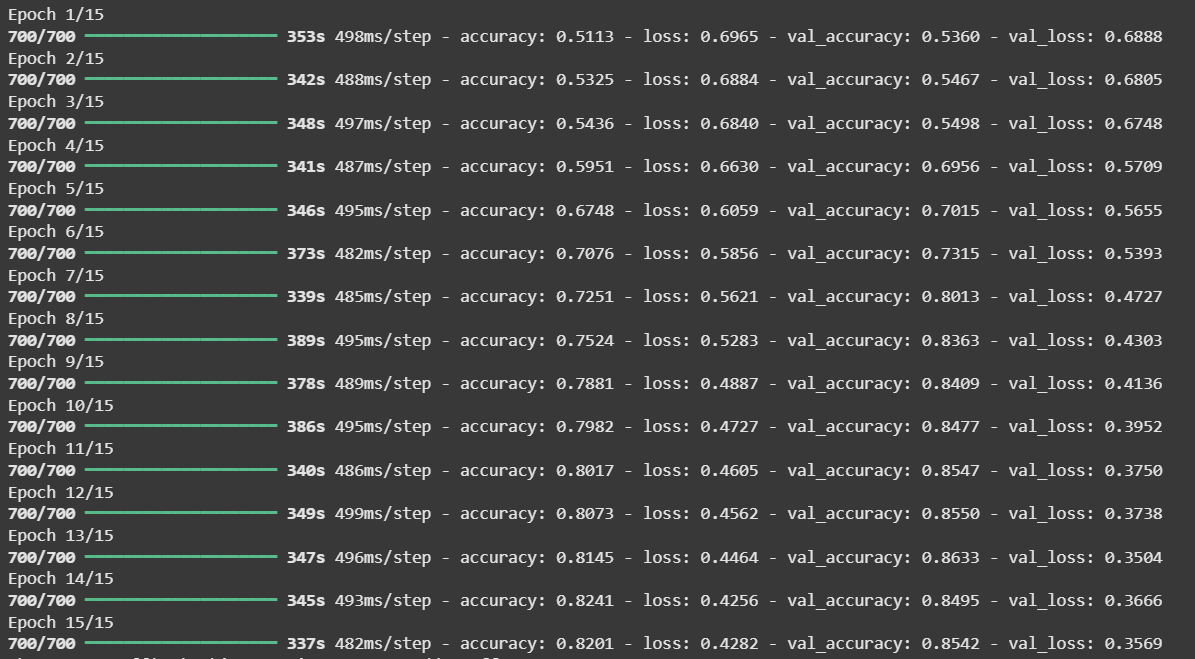

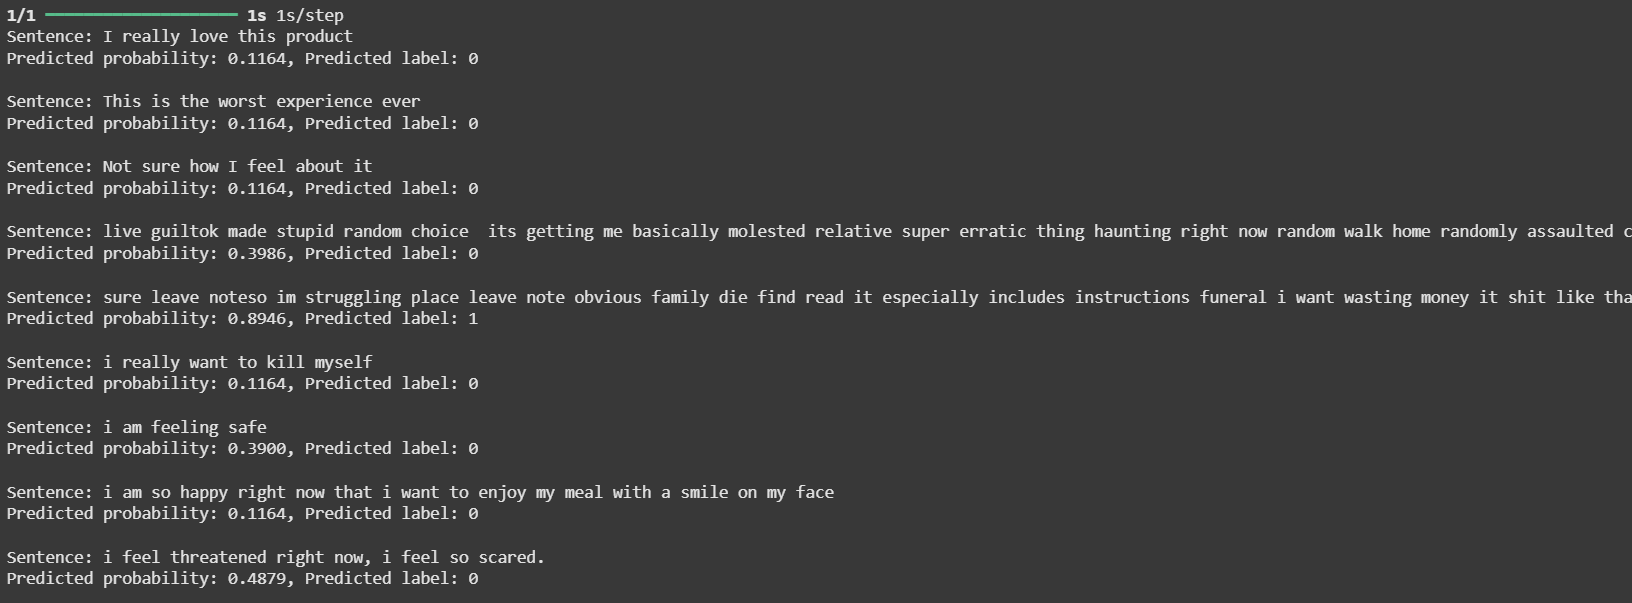

In [ ]:
# model.fit(
#     x_train, y_train,
#     validation_data=(x_test, y_test),
#     epochs = 5,
#     batch_size = 32,
#     callbacks=[early_stop],
#     verbose=1
# )

Epoch 1/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 341s 486ms/step - accuracy: 0.8193 - loss: 0.4351 - val_accuracy: 0.8613 - val_loss: 0.3566
Epoch 2/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 349s 498ms/step - accuracy: 0.8233 - loss: 0.4232 - val_accuracy: 0.8651 - val_loss: 0.3460
Epoch 3/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 374s 486ms/step - accuracy: 0.8325 - loss: 0.4131 - val_accuracy: 0.8629 - val_loss: 0.3492
Epoch 4/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 341s 487ms/step - accuracy: 0.8108 - loss: 0.4406 - val_accuracy: 0.8729 - val_loss: 0.3340
Epoch 5/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 340s 486ms/step - accuracy: 0.8332 - loss: 0.4101 - val_accuracy: 0.8711 - val_loss: 0.3388


In [ ]:
#  from tensorflow.keras.preprocessing.sequence import pad_sequences
# import numpy as np

# # Suppose these are new sentences you want to validate
# sentences = [
#     "I really love this product",
#     "This is the worst experience ever",
#     "Not sure how I feel about it",
#     'live guiltok made stupid random choice  its getting me basically molested relative super erratic thing haunting right now random walk home randomly assaulted classmate screamed name loud pretty much annoying asshole everything could torment later excluded i excluded well none mattered later went bunch horrible things people already loner death wish gets everyday living guilt possibly created mass shooter hear hes basically end life ready die', # -> 0
#     'sure leave noteso im struggling place leave note obvious family die find read it especially includes instructions funeral i want wasting money it shit like that need find soon can want find kill though difficult impulsive person know exactly im going it definately happening soon want find die freak out leave this', # -> 1
#     'i really want to kill myself',
#     'i am feeling safe',
#     'i am so happy right now that i want to enjoy my meal with a smile on my face',
#     'i feel threatened right now, i feel so scared.'
# ]

# # 1️⃣ Convert sentences to sequences using the same tokenizer
# sequences = tokenizer.texts_to_sequences(sentences)

# # 2️⃣ Pad sequences to the same max_len used in training
# padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# # 3️⃣ Predict probabilities
# pred_probs = model.predict(padded_sequences)

# # 4️⃣ Convert probabilities to binary labels (for binary classification)
# pred_labels = (pred_probs > 0.5).astype(int)

# # 5️⃣ Print results
# for i, sent in enumerate(sentences):
#     print(f"Sentence: {sent}")
#     print(f"Predicted probability: {pred_probs[i][0]:.4f}, Predicted label: {pred_labels[i][0]}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
Sentence: I really love this product
Predicted probability: 0.1242, Predicted label: 0

Sentence: This is the worst experience ever
Predicted probability: 0.1242, Predicted label: 0

Sentence: Not sure how I feel about it
Predicted probability: 0.3472, Predicted label: 0

Sentence: live guiltok made stupid random choice  its getting me basically molested relative super erratic thing haunting right now random walk home randomly assaulted classmate screamed name loud pretty much annoying asshole everything could torment later excluded i excluded well none mattered later went bunch horrible things people already loner death wish gets everyday living guilt possibly created mass shooter hear hes basically end life ready die
Predicted probability: 0.7716, Predicted label: 1

Sentence: sure leave noteso im struggling place leave note obvious family die find read it especially includes instructions funeral i want wasting money it shit like that need find 

EPOCH = 5

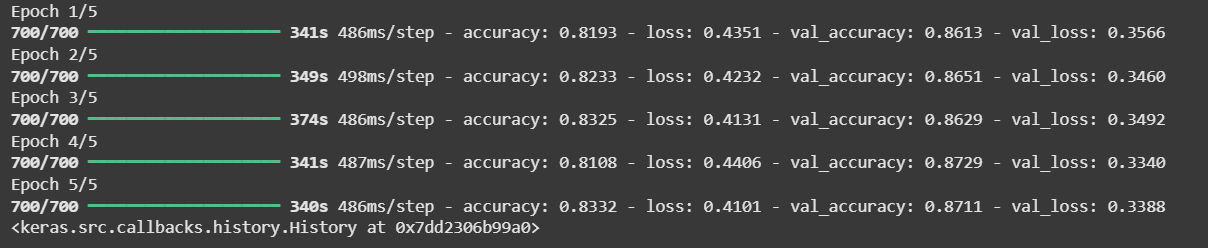

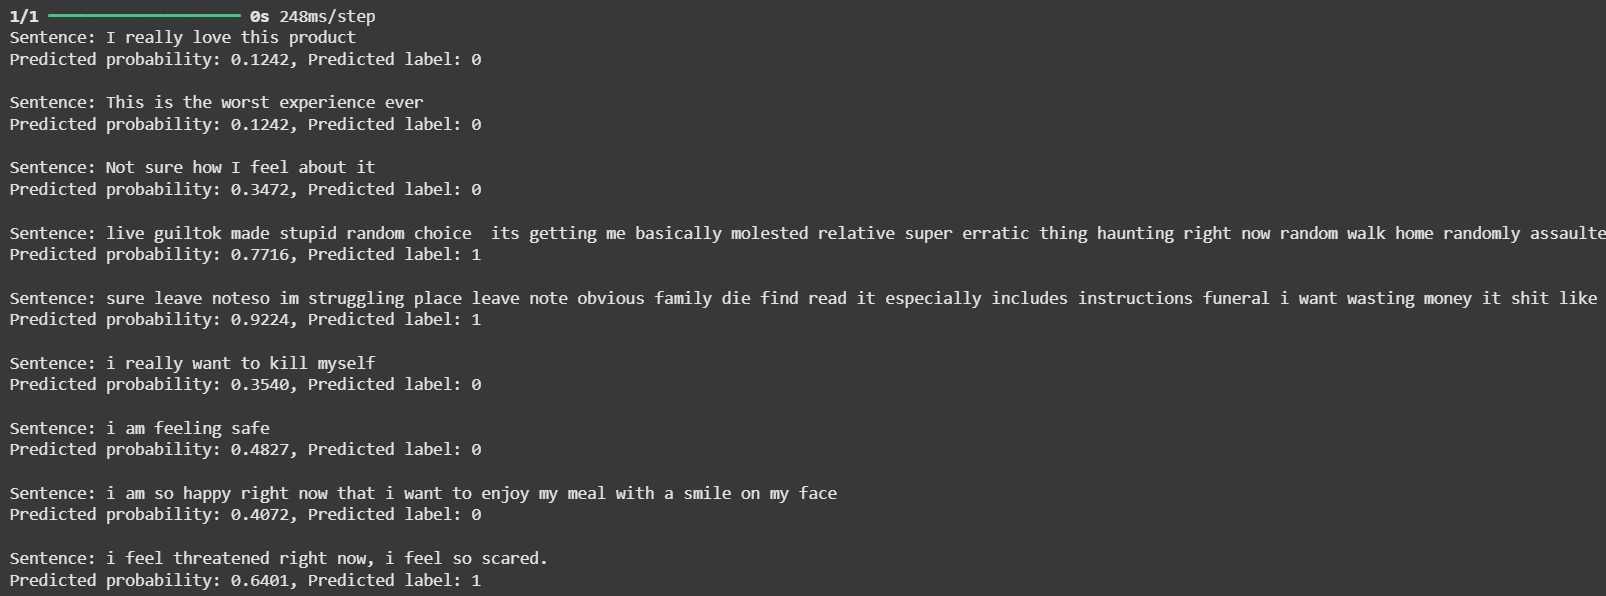

In [ ]:
# model.fit(
#     x_train, y_train,
#     validation_data=(x_test, y_test),
#     epochs = 5,
#     batch_size = 32,
#     callbacks=[early_stop],
#     verbose=1
# )

Epoch 1/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 349s 497ms/step - accuracy: 0.8268 - loss: 0.4247 - val_accuracy: 0.8697 - val_loss: 0.3306
Epoch 2/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 341s 488ms/step - accuracy: 0.8399 - loss: 0.3991 - val_accuracy: 0.8776 - val_loss: 0.3281
Epoch 3/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 341s 487ms/step - accuracy: 0.8273 - loss: 0.4205 - val_accuracy: 0.8706 - val_loss: 0.3239
Epoch 4/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 382s 487ms/step - accuracy: 0.8371 - loss: 0.3932 - val_accuracy: 0.8785 - val_loss: 0.3166
Epoch 5/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 381s 485ms/step - accuracy: 0.8420 - loss: 0.3886 - val_accuracy: 0.8785 - val_loss: 0.3118


In [ ]:
#  from tensorflow.keras.preprocessing.sequence import pad_sequences
# import numpy as np

# # Suppose these are new sentences you want to validate
# sentences = [
#     "I really love this product",
#     "This is the worst experience ever",
#     "Not sure how I feel about it",
#     'live guiltok made stupid random choice  its getting me basically molested relative super erratic thing haunting right now random walk home randomly assaulted classmate screamed name loud pretty much annoying asshole everything could torment later excluded i excluded well none mattered later went bunch horrible things people already loner death wish gets everyday living guilt possibly created mass shooter hear hes basically end life ready die', # -> 0
#     'sure leave noteso im struggling place leave note obvious family die find read it especially includes instructions funeral i want wasting money it shit like that need find soon can want find kill though difficult impulsive person know exactly im going it definately happening soon want find die freak out leave this', # -> 1
#     'i really want to kill myself',
#     'i am feeling safe',
#     'i am so happy right now that i want to enjoy my meal with a smile on my face',
#     'i feel threatened right now, i feel so scared.'
# ]

# # 1️⃣ Convert sentences to sequences using the same tokenizer
# sequences = tokenizer.texts_to_sequences(sentences)

# # 2️⃣ Pad sequences to the same max_len used in training
# padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# # 3️⃣ Predict probabilities
# pred_probs = model.predict(padded_sequences)

# # 4️⃣ Convert probabilities to binary labels (for binary classification)
# pred_labels = (pred_probs > 0.5).astype(int)

# # 5️⃣ Print results
# for i, sent in enumerate(sentences):
#     print(f"Sentence: {sent}")
#     print(f"Predicted probability: {pred_probs[i][0]:.4f}, Predicted label: {pred_labels[i][0]}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Sentence: I really love this product
Predicted probability: 0.1062, Predicted label: 0

Sentence: This is the worst experience ever
Predicted probability: 0.1062, Predicted label: 0

Sentence: Not sure how I feel about it
Predicted probability: 0.1062, Predicted label: 0

Sentence: live guiltok made stupid random choice  its getting me basically molested relative super erratic thing haunting right now random walk home randomly assaulted classmate screamed name loud pretty much annoying asshole everything could torment later excluded i excluded well none mattered later went bunch horrible things people already loner death wish gets everyday living guilt possibly created mass shooter hear hes basically end life ready die
Predicted probability: 0.8374, Predicted label: 1

Sentence: sure leave noteso im struggling place leave note obvious family die find read it especially includes instructions funeral i want wasting money it shit like that need find 

EPOCH = 5

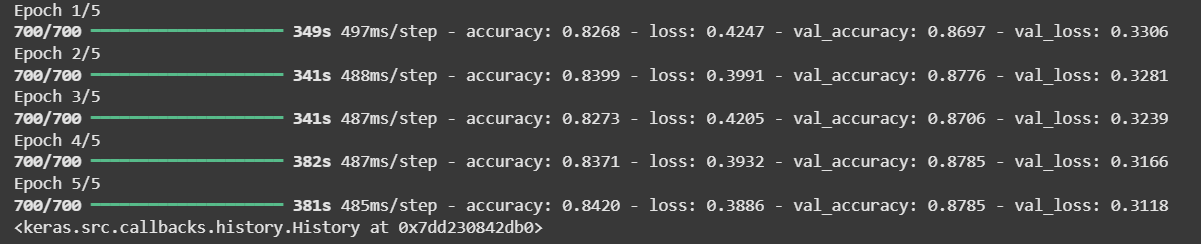

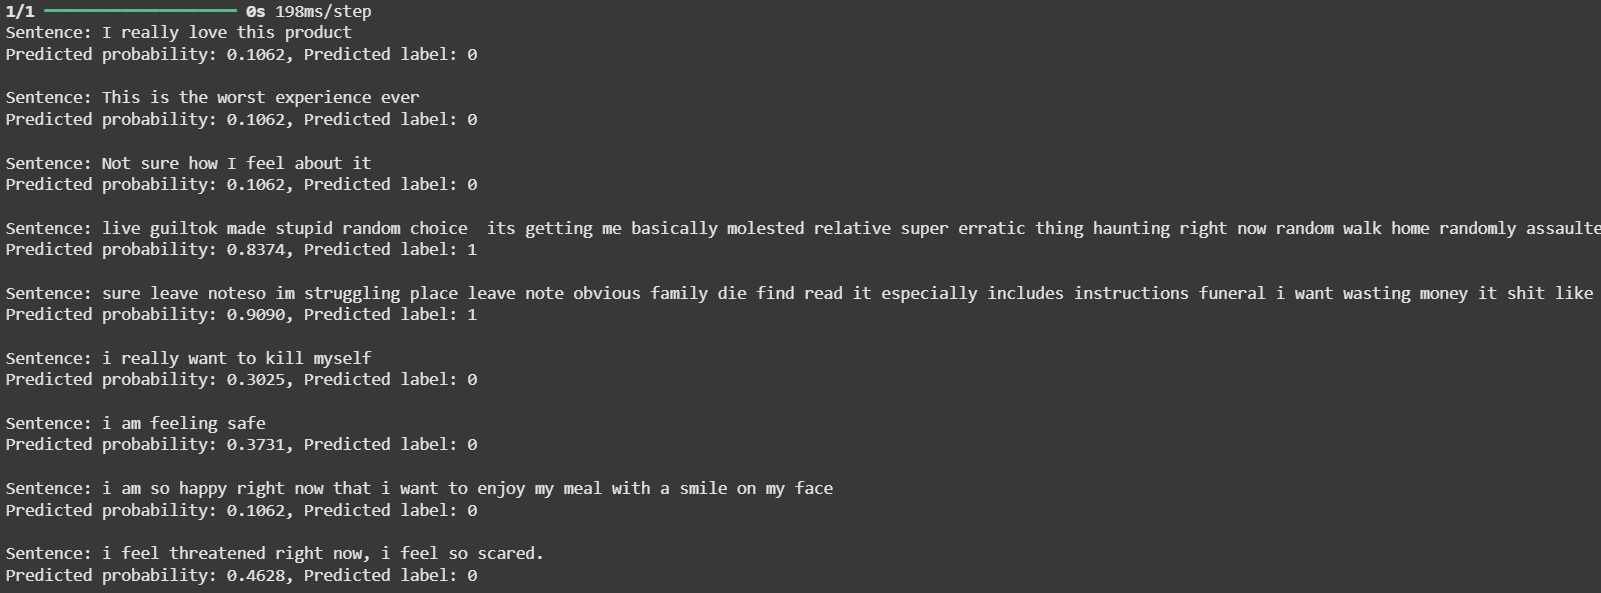

saved GRU phase3 model

In [ ]:
# model.save('gru_phace3_epoch_15_5_5.keras')

In [ ]:
from sklearn.model_selection import train_test_split

# Suppose you have:
texts = df['text']
labels = df['label']

# Split raw text (before any tokenization)
x_train_text, x_test_text, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)